### KNN on SVHN

#### Import the data from drive

In [0]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
np.seterr(over='ignore')
import os
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
import h5py
import numpy as np

# Open the file as readonly
h5f = h5py.File('/content/drive/My Drive/DLCP/Project-1/Data/SVHN_single_grey1.h5', 'r')

# Load the training, test and validation set
x_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
x_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]


# Close this file
h5f.close()

x_train = x_train.reshape(x_train.shape[0], 1024)
x_test = x_test.reshape(x_test.shape[0], 1024)

# # normalize inputs from 0-255 to 0-1
x_train = x_train / 255.0
x_test = x_test / 255.0

print('Training set', x_train.shape, y_train.shape)
print('Test set', x_test.shape, y_test.shape)

Training set (42000, 1024) (42000,)
Test set (18000, 1024) (18000,)


In [5]:
print(x_train.shape)
print(y_train.shape)

(42000, 1024)
(42000,)


In [6]:
print(x_test.shape)
print(y_test.shape)

(18000, 1024)
(18000,)


### Visualizing the first 10 images in the dataset and their labels

<Figure size 720x720 with 0 Axes>

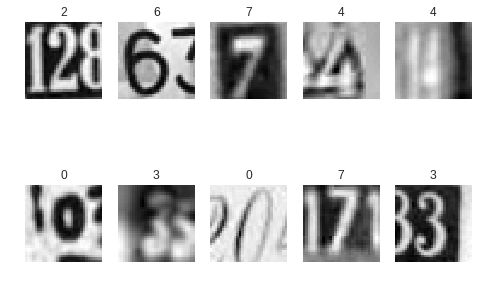

In [26]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
fig = plt.figure()
columns = 5
rows = 2
for i in range(1,columns*rows+1):
  img = x_train[i-1].reshape((32,32))
  fig.add_subplot(rows,columns,i)
  plt.gca().set_title(y_train[i-1])
  plt.gca().axis('off')
  plt.imshow(img,cmap="gray")
plt.show()

### Build KNN and predict the outputs for any 2 images from the test data.

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
kVals = range(41, 50, 2)
accuracies = []
 
# loop over various values of `k` for the k-Nearest Neighbor classifier
for k in range(41, 50, 2):
	# train the k-Nearest Neighbor classifier with the current value of `k`
	model = KNeighborsClassifier(n_neighbors=k)
	model.fit(x_train, y_train)
 
	# evaluate the model and update the accuracies list
	score = model.score(x_test, y_test)
	print("k=%d, accuracy=%.2f%%" % (k, score * 100))
	accuracies.append(score)
 
# find the value of k that has the largest accuracy
i = int(np.argmax(accuracies))
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
	accuracies[i] * 100))

k=41, accuracy=53.73%
k=43, accuracy=53.82%
k=45, accuracy=53.82%
k=47, accuracy=54.02%
k=49, accuracy=53.81%
k=47 achieved highest accuracy of 54.02% on validation data


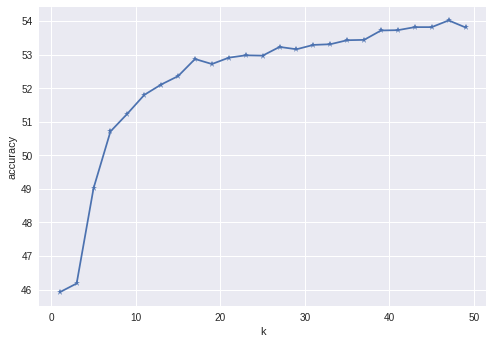

In [15]:
# Run the above cell with different ranges 
# Since Colab doesn't allow more than 12 hrs of continuous GPU run
# Compile the results in python lists
# Accuracy plotted against k value
k = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49]
accuracies = [45.92,46.18,49.02,50.71,51.24,51.80,52.11,52.36,52.87,52.72,52.91,52.98,52.97,53.23,53.16,53.29,53.31,53.43,53.44,53.72,53.73,53.82,53.82,54.02,53.81]
plt.plot(k,accuracies,'*-')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

In [16]:
# Train the model for k=47
model = KNeighborsClassifier(n_neighbors=47)
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=47, p=2,
           weights='uniform')

<Figure size 720x720 with 0 Axes>

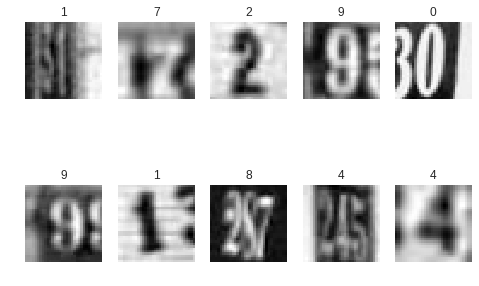

In [31]:
# Before using the model to make the prediction
# let's see the first 10 images in test set
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
fig = plt.figure()
columns = 5
rows = 2
for i in range(1,columns*rows+1):
  img = x_test[i-1].reshape((32,32))
  fig.add_subplot(rows,columns,i)
  plt.gca().set_title(y_test[i-1])
  plt.gca().axis('off')
  plt.imshow(img,cmap="gray")
plt.show()

In [0]:
# Let's use the model to predict the result
# for 3rd and 4th image in test set
y_pred = model.predict(x_test[2:4])

In [40]:
print("3rd Image: Correct - {}; Prediction - {}".format(y_test[2],y_pred[0]))
print("4th Image: Correct - {}; Prediction - {}".format(y_test[3],y_pred[1]))

3rd Image: Correct - 2; Prediction - 2
4th Image: Correct - 9; Prediction - 9


In [0]:
# The model performed perfectly on these 2 images
# What about images which were not clear enough?
# Like image 1 and 2 in test set
y_pred = model.predict(x_test[:2])

In [42]:
print("1st Image: Correct - {}; Prediction - {}".format(y_test[0],y_pred[0]))
print("2nd Image: Correct - {}; Prediction - {}".format(y_test[1],y_pred[1]))

1st Image: Correct - 1; Prediction - 0
2nd Image: Correct - 7; Prediction - 2
